In [39]:
import os
import datetime
import IPython
import IPython.display
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import tensorflow as tf
from sklearn import metrics 


mpl.rcParams['figure.figsize'] = (8, 6)
mpl.rcParams['axes.grid'] = False

# Generate data

In [4]:
# I need to use the sin function
# First I need to generate the x
periods = 100
points_per_period = 50
data = np.sin(np.linspace(0,2*np.pi*periods, num=periods*points_per_period)) #This is my x, it will be my angles, 0 to pi.
data                                                                         #it will creat equaly size spaces between 0 and .. (linspace)
                                                                            #and I apply the sin....

array([ 0.00000000e+00,  1.25358173e-01,  2.48738583e-01, ...,
       -2.48738583e-01, -1.25358173e-01,  3.92877345e-15])

In [ ]:
# The sin function gave me the complete signal. But we need to adapt for this problem
# To make predictions we need to to have several windows.
## We consturct a data set  which has 12 datapoints and the label. Fazemos um shift de 12 em 12.
## it says we need to use a filter of 12 (we are going to observe the 12 and predict the next 1). Then we shift again and so one

## Adapt Data for Time series 

In [29]:
# lets add the lag
periods = 100
lag = 12
points_per_period = 50
data = np.sin(np.linspace(0,2*np.pi*periods, num=periods*points_per_period)) #This is my x, it will be my angles, 0 to pi.

X, y = [], []
for i in range(lag, data.shape[0]-1):
    X.append(data[i-lag:i]) # we getting 12 sample. My x will have 4000 samples each with 12 instances
    y.append(data[i])

y = np.array(y)

In [53]:
# add ao data o gaussian noise! (np.random(loc=0,sacale (0.05, size = data[shape[0]])))
# e depois repetir o split em X e y
#plotar para comparar 

Lets vizualize the first 100 datapoints

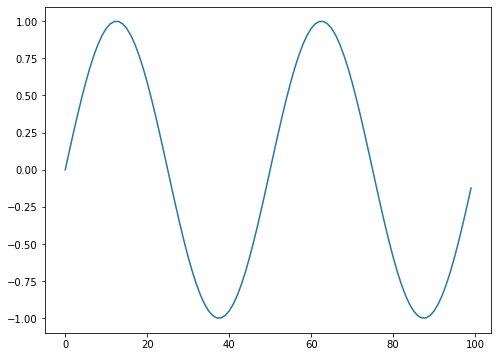

In [30]:
plt.plot(data[:100])

# LSTM

In [31]:
lstm_model = tf.keras.models.Sequential([
    tf.keras.layers.InputLayer((lag,1)),    # The input layer will be lag
    tf.keras.layers.LSTM(10),  # Since we have an imput of 12 it doesnt make sence to use higher than that # trocar par DENSE
    tf.keras.layers.Dense(1, activation="tanh"), # Since I want to predict 1 value I want to output 1!
])

FOr this type of problem, since we are comparing values, the MSE is the best lost function, for images would be the cross entropy

In [32]:
lstm_model.compile(optimizer = "Adam", loss = "mse")

We cannot provide the X directly to LSTM.\
We have a 2 dimensional matrix  atm -  we have number of sample and time points we are missing number of features\
Lets tranform the X

In [33]:
X_lstm = np.expand_dims(X, axis = 2)
X_lstm

array([[[ 0.        ],
        [ 0.12535817],
        [ 0.24873858],
        ...,
        [ 0.90492336],
        [ 0.95113417],
        [ 0.98233903]],

       [[ 0.12535817],
        [ 0.24873858],
        [ 0.36819467],
        ...,
        [ 0.95113417],
        [ 0.98233903],
        [ 0.99804562]],

       [[ 0.24873858],
        [ 0.36819467],
        [ 0.48184179],
        ...,
        [ 0.98233903],
        [ 0.99804562],
        [ 0.99800616]],

       ...,

       [[-0.95093993],
        [-0.98222125],
        [-0.99800616],
        ...,
        [-0.68465705],
        [-0.58788693],
        [-0.48184179]],

       [[-0.98222125],
        [-0.99800616],
        [-0.99804562],
        ...,
        [-0.58788693],
        [-0.48184179],
        [-0.36819467]],

       [[-0.99800616],
        [-0.99804562],
        [-0.98233903],
        ...,
        [-0.48184179],
        [-0.36819467],
        [-0.24873858]]])

# I) Train with the first 2400 data points and test with data points 2401 to 2500, to observe the burn-in effect

### Fit

In [34]:
X_lstm_train = X_lstm[:2400]
y_lstm_train = y[:2400]

THe fit shuffles by default and we dont want that, we want to preserva the order. 

In [37]:
lstm_model.fit(X_lstm_train, y_lstm_train, batch_size=1, epochs=1, shuffle=False)

2400/2400 [==============================] - 14s 6ms/step - loss: 0.0069


### Predict

In [36]:
X_lstm_pred = X_lstm[2401:2501]

In [41]:
y_pred = lstm_model.predict(X_lstm_pred)

4/4 [==============================] - 0s 5ms/step


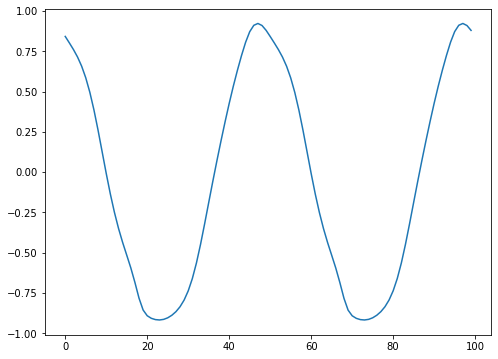

In [45]:
plt.plot(y_pred[:100])

In [43]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y[2401:2501], y_pred)

0.009945884272441731

# II) Train from data points 2401 to 4900 and test with data points 4901 to 5000.

## Second Fit 

network needs to "warm up" to find the direction of the gradient. This will have  a huge impact on the MSE this  to pass the 

In [44]:
lstm_model.fit(X_lstm[2400:4900], y = y[2400:4900], batch_size=1, epochs=1, shuffle=False) # we do this to pass the burning efect

2500/2500 [==============================] - 14s 6ms/step - loss: 0.0047


In [46]:
y_pred = lstm_model.predict(X_lstm[4900:])

3/3 [==============================] - 0s 3ms/step


In [47]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y[4900:], y_pred)

0.006807565222655724

# Problem 1
- Use as a time series a sinusoidal function with 100 periods and 50 points per period, with:\

In [48]:
from keras.layers import GaussianNoise

## i) no noise, clean.



## ii) with noise by adding a Gaussian N(0,0.05)

In [52]:
lstm_model.add(GaussianNoise(.05))

Problema2

In [ ]:
# amostra com 5,6,3. X3 ser X3
# criar dados 